# Political Violence Targeting Women & Demonstrations Featuring Women

#### All violence targeting women, as well as demonstrations featuring women, are included in the data file below. The data in this file cover all events in which women were specifically targeted by political violence, not all events involving women in any way; the file also covers all demonstration events in which women were specifically featured, not all demonstrations involving women. 

#### This dataset was extract from ACLED Access Portal and we perform EDA using Python.


## Data Collection & Data Exploration

We import pandas and necessary libraries for dataframe manipulation and analysis.

In [1]:
# Libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from datetime import datetime, date


In [2]:
# Dataset is downloaded
df_gpv = pd.read_csv("gender_Sep27-1.csv")
df_gpv.drop([
    'event_id_cnty',
    #'event_date', 
    'year', 
    'time_precision',
    'disorder_type', 
    #'event_type', 
    #'sub_event_type', 
    'actor1',
    'assoc_actor_1', 
    #'inter1', 
    'actor2', 
    'assoc_actor_2', 
    'inter2',
    #'interaction', 
    'civilian_targeting', 
    #'iso',
    #'region', 
    #'country',
    'admin1', 
    'admin2', 
    'admin3', 
    #'location', 
    #'latitude', 
    #'longitude',
    'geo_precision', 
    'source', 
    'source_scale', 
    #'notes', 
    #'fatalities',
    'tags',
    'timestamp'                           
], axis=1, inplace=True)


df_gpv["date"] = df_gpv["event_date"].apply(date.fromisoformat)

display(df_gpv.shape)

(75563, 14)

#### Exploring attributes of date.time

In [3]:
df_gpv['date'][0]

datetime.date(2024, 9, 27)

In [4]:
df_gpv['date'][0].year

2024

In [5]:
df_gpv['date'][0].month

9

In [6]:
df_gpv['date'][0].day

27

#### Exploring the dataset

In [7]:
# First rows are checked

display(df_gpv.head(2))

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,latitude,longitude,notes,fatalities,date
0,2024-09-27,Violence against civilians,Sexual violence,Political militia,Political militia-Civilians,76,South America,Brazil,Sorriso,-12.5453,-55.7114,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,2024-09-27
1,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,218,South America,Ecuador,Guayaquil,-2.1962,-79.8862,"Around 27 September 2024 (as reported), in Gua...",1,2024-09-27


In [8]:
# Last five rows are checking

display(df_gpv.tail(2))

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,latitude,longitude,notes,fatalities,date
75561,1997-01-15,Violence against civilians,Attack,Political militia,Political militia-Civilians,646,Eastern Africa,Rwanda,Ruhengeri,-1.4998,29.635,"Around 15 January 1997 (month of), 3 spanish a...",3,1997-01-15
75562,1997-01-06,Violence against civilians,Attack,Identity militia,Identity militia-Civilians,562,Western Africa,Niger,Niamey,13.5200,2.120,A french woman was shot and killed by Tuareg r...,1,1997-01-06


In [9]:
# Columns's names are checked

display(df_gpv.keys())

Index(['event_date', 'event_type', 'sub_event_type', 'inter1', 'interaction',
       'iso', 'region', 'country', 'location', 'latitude', 'longitude',
       'notes', 'fatalities', 'date'],
      dtype='object')

In [10]:
# Structural Overview of the DataFrame

df_gpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75563 entries, 0 to 75562
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_date      75563 non-null  object 
 1   event_type      75563 non-null  object 
 2   sub_event_type  75563 non-null  object 
 3   inter1          75563 non-null  object 
 4   interaction     75563 non-null  object 
 5   iso             75563 non-null  int64  
 6   region          75563 non-null  object 
 7   country         75563 non-null  object 
 8   location        75563 non-null  object 
 9   latitude        75563 non-null  float64
 10  longitude       75563 non-null  float64
 11  notes           75563 non-null  object 
 12  fatalities      75563 non-null  int64  
 13  date            75563 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 8.1+ MB


In [11]:
# Basic statistical description (numerical columns)

df_gpv.describe()

,iso,latitude,longitude,fatalities
count,75563.000000,75563.000000,75563.000000,75563.000000
mean,457.337401,23.442707,12.084752,0.255323
std,251.661696,20.843715,72.187548,4.010021
min,0.000000,-54.806200,-171.755300,0.000000
25%,276.000000,13.212700,-65.216900,0.000000
50%,410.000000,26.664500,25.208100,0.000000
75%,710.000000,37.597100,73.685400,0.000000
max,894.000000,72.913600,178.448700,750.000000


In [12]:
# Displaying random column
df_gpv['inter1']

0        Political militia
1        Political militia
2        Political militia
3        Political militia
4             State forces
               ...        
75558          Rebel group
75559          Rebel group
75560          Rebel group
75561    Political militia
75562     Identity militia
Name: inter1, Length: 75563, dtype: object

#### Checking unique values

In [13]:
df_gpv['region'].unique()

array(['South America', 'North America', 'Middle East', 'Southern Africa',
       'Europe', 'East Asia', 'South Asia', 'Northern Africa',
       'Western Africa', 'Middle Africa', 'Central America',
       'Caucasus and Central Asia', 'Southeast Asia', 'Eastern Africa',
       'Caribbean', 'Oceania'], dtype=object)

In [14]:
df_gpv['event_type'].unique()

array(['Violence against civilians', 'Protests', 'Riots',
       'Strategic developments', 'Explosions/Remote violence'],
      dtype=object)

In [15]:
df_gpv['inter1'].unique()


array(['Political militia', 'State forces', 'Protesters', 'Rioters',
       'Identity militia', 'External/Other forces', 'Rebel group',
       'Civilians'], dtype=object)

In [16]:
df_gpv['interaction'].unique()

array(['Political militia-Civilians', 'State forces-Civilians',
       'Protesters only', 'Rioters-Civilians',
       'Identity militia-Civilians', 'External/Other forces-Civilians',
       'Rebel group-Civilians', 'State forces-Protesters',
       'State forces-Rioters', 'Rioters only', 'Protesters-Protesters',
       'Rebel group-Protesters', 'Civilians only', 'Rioters-Protesters',
       'Rioters-Rioters', 'Political militia-Protesters',
       'Civilians-Civilians', 'Protesters-External/Other forces',
       'Identity militia only', 'Rioters-External/Other forces',
       'Political militia-Rioters', 'Rebel group-Rioters',
       'Identity militia-Protesters'], dtype=object)

In [17]:
df_gpv['sub_event_type'].unique()

array(['Sexual violence', 'Attack', 'Abduction/forced disappearance',
       'Peaceful protest', 'Mob violence', 'Protest with intervention',
       'Violent demonstration', 'Arrests', 'Looting/property destruction',
       'Other', 'Excessive force against protesters', 'Grenade',
       'Remote explosive/landmine/IED',
       'Shelling/artillery/missile attack', 'Disrupted weapons use',
       'Air/drone strike', 'Suicide bomb'], dtype=object)

#### Handling missing data

In [18]:
# Missing values are identifying

df_gpv.isnull().sum()

event_date        0
event_type        0
sub_event_type    0
inter1            0
interaction       0
iso               0
region            0
country           0
location          0
latitude          0
longitude         0
notes             0
fatalities        0
date              0
dtype: int64

## Pre-processing data

In [19]:
df_gpv[df_gpv['fatalities']== 750].iloc[0]['notes']

'On 18 August 2011, Murle militia attacked the town of Pieri (Uror county, Jonglei state), killing at least 750 Lou Nuer residents. Nearly 1,000 were wounded, and dozens of women as well as children were abducted. 38,000 head of cattle were allegedly stolen.'

In [20]:
df_gpv['region'].unique()

array(['South America', 'North America', 'Middle East', 'Southern Africa',
       'Europe', 'East Asia', 'South Asia', 'Northern Africa',
       'Western Africa', 'Middle Africa', 'Central America',
       'Caucasus and Central Asia', 'Southeast Asia', 'Eastern Africa',
       'Caribbean', 'Oceania'], dtype=object)

In [21]:
region_map = {
    'africa': ['Southern Africa', 'Northern Africa', 'Middle Africa', 'Western Africa', 'Eastern Africa'],
    'middle east': ['Middle East'],
    'asia':['Caucasus and Central Asia', 'Sotheast Asia', 'South Asia', 'East Asia'],
    'america and caribbean' :[ 'South America', 'North America', 'Central America', 'Caribbean'],
    'europe': ['Europe'],
    'oceania': ['Oceania']
}


In [22]:
# Flatten the mapping to map each element to its group
flattened_map = {item: key for key, values in region_map.items() for item in values}

#flattened_map = {}
#for key, values in region_map.items():
#    for item in values:
#        flattened_map[item] = key


In [23]:
#new_column = {'region': ['america', 'middle east', 'asia', 'america and caribbean', 'europe', 'oceania']}

df_gpv['region'] = df_gpv['region'].map(flattened_map)

display(df_gpv)

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,latitude,longitude,notes,fatalities,date
0,2024-09-27,Violence against civilians,Sexual violence,Political militia,Political militia-Civilians,76,america and caribbean,Brazil,Sorriso,-12.5453,-55.7114,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,2024-09-27
1,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,218,america and caribbean,Ecuador,Guayaquil,-2.1962,-79.8862,"Around 27 September 2024 (as reported), in Gua...",1,2024-09-27
2,2024-09-27,Violence against civilians,Abduction/forced disappearance,Political militia,Political militia-Civilians,484,america and caribbean,Mexico,Tijuana,32.5325,-117.0190,"Around 27 September 2024 (as reported), in Tij...",0,2024-09-27
3,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,484,america and caribbean,Mexico,Ciudad de Mexico - Gustavo A. Madero,19.4829,-99.1135,"On 27 September 2024, in Ciudad de Mexico - Gu...",1,2024-09-27
4,2024-09-27,Violence against civilians,Attack,State forces,State forces-Civilians,887,middle east,Yemen,Al Yahari,13.9966,44.0604,"On 27 September 2024, a Houthi-affiliated fema...",0,2024-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75558,1997-03-05,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,800,africa,Uganda,Palabek,3.4333,32.5667,After failing to find deserters they captured ...,9,1997-03-05
75559,1997-02-24,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,12,africa,Algeria,Berrouaghia,36.1352,2.9109,24 March: 5 young girls were killed in Berroua...,5,1997-02-24
75560,1997-01-22,Violence against civilians,Sexual violence,Rebel group,Rebel group-Civilians,694,africa,Sierra Leone,Magburaka,8.7167,-11.9500,Week of 22 January. RUF forces attacked civili...,40,1997-01-22
75561,1997-01-15,Violence against civilians,Attack,Political militia,Political militia-Civilians,646,africa,Rwanda,Ruhengeri,-1.4998,29.6350,"Around 15 January 1997 (month of), 3 spanish a...",3,1997-01-15


## Plotting data

#### Region vs Fatalities

In [24]:
df_gpv['region'].unique()

array(['america and caribbean', 'middle east', 'africa', 'europe', 'asia',
       nan, 'oceania'], dtype=object)

In [25]:
df_gpv[df_gpv['fatalities']== 750].iloc[0]['notes']

'On 18 August 2011, Murle militia attacked the town of Pieri (Uror county, Jonglei state), killing at least 750 Lou Nuer residents. Nearly 1,000 were wounded, and dozens of women as well as children were abducted. 38,000 head of cattle were allegedly stolen.'

In [26]:
df_test = df_gpv[df_gpv['region'] == 'africa']
df_test

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,latitude,longitude,notes,fatalities,date
5,2024-09-27,Protests,Peaceful protest,Protesters,Protesters only,710,africa,South Africa,Sebokeng,-26.5833,27.8333,"Around 27 September 2024 (as reported), reside...",0,2024-09-27
12,2024-09-26,Protests,Peaceful protest,Protesters,Protesters only,729,africa,Sudan,Kassala,15.4296,36.4105,"On 26 September 2024, women staged a protest i...",0,2024-09-26
13,2024-09-26,Riots,Mob violence,Rioters,Rioters-Civilians,716,africa,Zimbabwe,Harare,-17.8277,31.0534,"On 26 September 2024, a mob attacked and attem...",0,2024-09-26
14,2024-09-26,Violence against civilians,Abduction/forced disappearance,Identity militia,Identity militia-Civilians,566,africa,Nigeria,Jibia,13.0978,7.2225,"On 26 September 2024, a Katsina militia abduct...",0,2024-09-26
19,2024-09-26,Violence against civilians,Sexual violence,Political militia,Political militia-Civilians,180,africa,Democratic Republic of Congo,Sake,-1.5713,29.0536,"Around 26 September 2024 (as reported), a susp...",0,2024-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75558,1997-03-05,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,800,africa,Uganda,Palabek,3.4333,32.5667,After failing to find deserters they captured ...,9,1997-03-05
75559,1997-02-24,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,12,africa,Algeria,Berrouaghia,36.1352,2.9109,24 March: 5 young girls were killed in Berroua...,5,1997-02-24
75560,1997-01-22,Violence against civilians,Sexual violence,Rebel group,Rebel group-Civilians,694,africa,Sierra Leone,Magburaka,8.7167,-11.9500,Week of 22 January. RUF forces attacked civili...,40,1997-01-22
75561,1997-01-15,Violence against civilians,Attack,Political militia,Political militia-Civilians,646,africa,Rwanda,Ruhengeri,-1.4998,29.6350,"Around 15 January 1997 (month of), 3 spanish a...",3,1997-01-15


In [27]:
df_test['fatalities'].sum()

# crear un dict con la región como key, y fatality como value. Ver la suma total, hacer un barplot con cada una de las regiones 
# (cada region tiene que tener una sola columna)

np.int64(9194)

In [28]:

# Variable as a list or array
#new_values = np.array([7, 8, 9])

# Add the variable as a new column
#df['NewColumn'] = new_values
#print(df)


In [29]:
display(df_gpv.groupby('region')['fatalities'].sum())

region
africa                   9194
america and caribbean    6709
asia                      692
europe                    106
middle east              1629
oceania                    54
Name: fatalities, dtype: int64

In [30]:
fatalities_p_region = df_gpv.groupby('region')['fatalities'].sum()

In [31]:
new_values = np.array(fatalities_p_region)

df_gpv['fatalities_per_region'] = new_values

ValueError: Length of values (6) does not match length of index (75563)

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df_gpv, x='region', hue='sub_event_type')
plt.title('Distribution of region grouped by subtypes')
plt.xlabel('region')
plt.ylabel('subtypes')
plt.legend(title='Region vs Subtypes')
plt.show()


In [44]:
df_test['fatalities']

# ¿qué es un fatalities = 0? leer las notas y ver qué sucedió
# el dataframe df_ es un dataframe de eventos, por cada evento se tiene un total de fatalities. Si contamos el nro de filas

5         0
12        0
13        0
14        0
19        0
         ..
75558     9
75559     5
75560    40
75561     3
75562     1
Name: fatalities, Length: 11281, dtype: int64

In [30]:
for n_fatalities, num_filas in df_test['fatalities'].value_counts().items():
    print(f"Este dataframe tiene {num_filas} filas (eventos) con {n_fatalities} fatalities.")

Este dataframe tiene 8600 filas (eventos) con 0 fatalities.
Este dataframe tiene 1848 filas (eventos) con 1 fatalities.
Este dataframe tiene 308 filas (eventos) con 2 fatalities.
Este dataframe tiene 165 filas (eventos) con 3 fatalities.
Este dataframe tiene 80 filas (eventos) con 4 fatalities.
Este dataframe tiene 44 filas (eventos) con 5 fatalities.
Este dataframe tiene 41 filas (eventos) con 10 fatalities.
Este dataframe tiene 36 filas (eventos) con 7 fatalities.
Este dataframe tiene 31 filas (eventos) con 6 fatalities.
Este dataframe tiene 18 filas (eventos) con 8 fatalities.
Este dataframe tiene 15 filas (eventos) con 9 fatalities.
Este dataframe tiene 13 filas (eventos) con 15 fatalities.
Este dataframe tiene 10 filas (eventos) con 12 fatalities.
Este dataframe tiene 10 filas (eventos) con 11 fatalities.
Este dataframe tiene 5 filas (eventos) con 20 fatalities.
Este dataframe tiene 5 filas (eventos) con 19 fatalities.
Este dataframe tiene 4 filas (eventos) con 40 fatalities.
Este

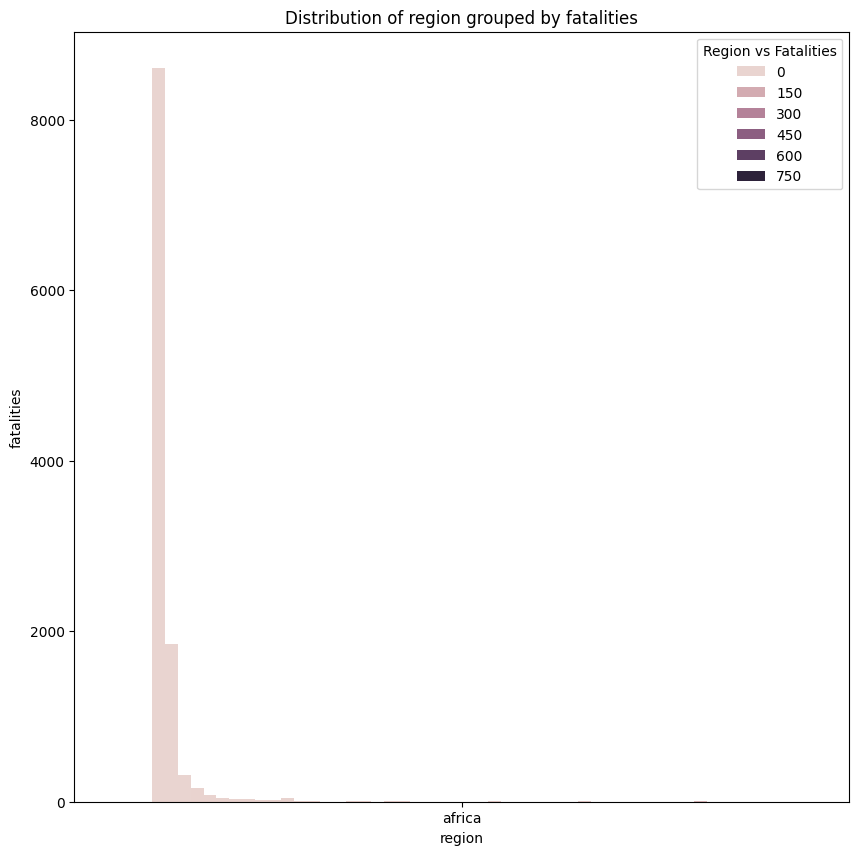

In [31]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df_test, x='region', hue='fatalities')
plt.title('Distribution of region grouped by fatalities')
plt.xlabel('region')
plt.ylabel('fatalities')
plt.legend(title='Region vs Fatalities')
plt.show()

#### Country vs Sub_type

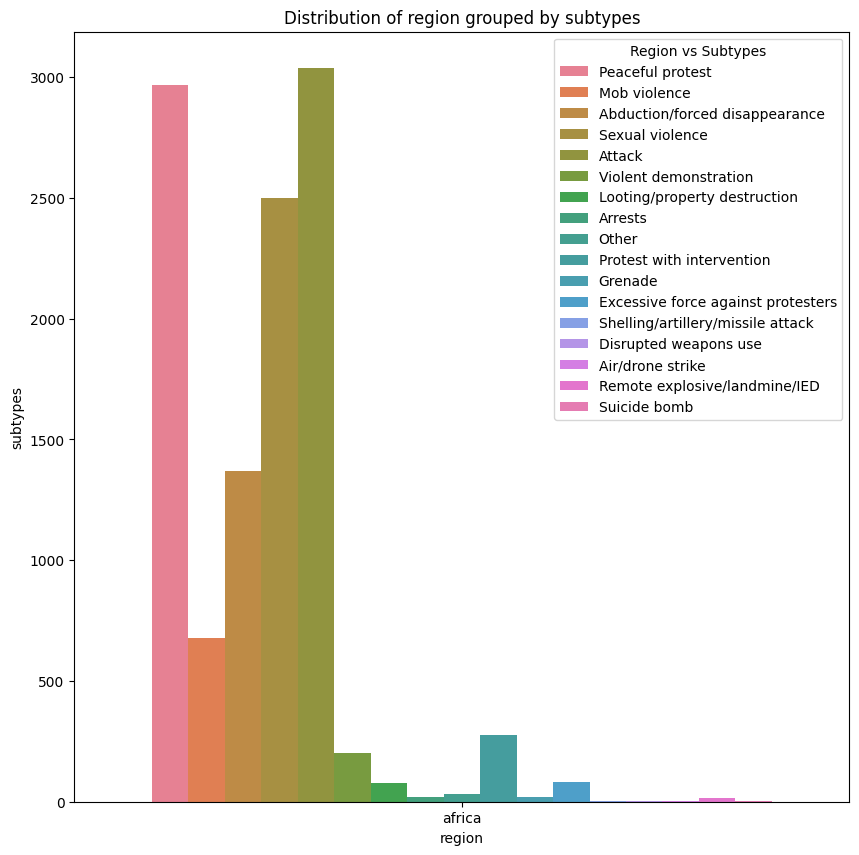

In [32]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df_test, x='region', hue='sub_event_type')
plt.title('Distribution of region grouped by subtypes')
plt.xlabel('region')
plt.ylabel('subtypes')
plt.legend(title='Region vs Subtypes')
plt.show()


In [ ]:
#hacer el mismo plot pero por cada elemento de 'sub_event_type', por region ---> crear una función

In [ ]:
df_gpv['sub_event_type'].value_counts()

In [ ]:
df_gpv.groupby('sub_event_type').size()


In [ ]:
category_colors = {
    'A':'#6A5ACD', 
    'B':'#6B8E23', 
    'C': 'BA55D3', 
    'D':'#B8860B', 
    'E':'#20B2AA', 
    'F':'#4682B4',
    'G':'#8B4513', 
    'H':'#B22222', 
    'I':'#6495ED', 
    'J':'#BDB76B', 
    'K':'#CD853F', 
    'J': '#48D1CC',
    'L': '#2F4F4F',
    'M':'#2E8B57',
    'N':'#5F9EA0', 
    'O': '#BC8F8F',
    'P':'#CD5C5C', 
    'Q':'#DDA0DD'
}
df_gpv['Color'] = df_gpv['sub_event_type'].map(category_colors)

In [ ]:
geo_data = df_gpv[
    'country',
    'sub_event_type',
    'latitude',
    'longitude'
]
   
df_geo = pd.DataFrame(geo_data)

In [ ]:
# Initialize the map centered on a rough global midpoint
m = folium.Map(location=[0, 0], zoom_start=2)

# Add a marker cluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for _, row in df_geo.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Region: {row['Region']}<br>Category: {row['Category']}",
        icon=folium.Icon(color=category_colors[row['Category']])
    ).add_to(marker_cluster)